# **Freshness Fiss Classification**

## Import the libray

In [16]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

## Import the data and define the directory

In [2]:
size = 64
base_dir = '/content/drive/My Drive/fresh and non-fresh fish'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [3]:
print("content of train folder:",os.listdir(train_dir))
print("content of val folder:",os.listdir(val_dir))

content of train folder: ['fresh', 'non-fresh']
content of val folder: ['non-fresh', 'fresh']


## Preview The Dataset

In [4]:
import glob
import matplotlib.pyplot as plt

def images_preview(x):
  a = glob.glob(x)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 3
  rows = 1
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

images preview of fresh fish train


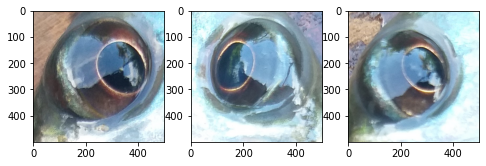


images preview of non-fresh fish train


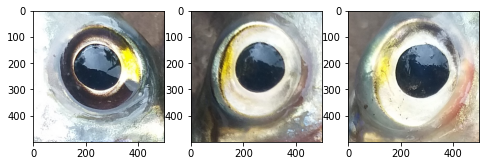

In [5]:
print("images preview of fresh fish train")
images_preview("/content/drive/My Drive/fresh and non-fresh fish/train/fresh/*")
print("\nimages preview of non-fresh fish train")
images_preview("/content/drive/My Drive/fresh and non-fresh fish/train/non-fresh/*")

images preview of fresh fish validation


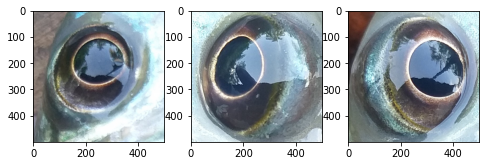


images preview of non-fresh fish validation


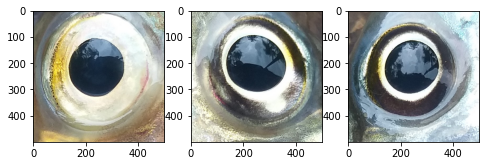

In [6]:
print("images preview of fresh fish validation")
images_preview("/content/drive/My Drive/fresh and non-fresh fish/val/fresh/*")
print("\nimages preview of non-fresh fish validation")
images_preview("/content/drive/My Drive/fresh and non-fresh fish/val/non-fresh/*")

## Image Augmentation

Because the number of datasets is limited, which is only 40 datasets. Then the augmentation process is carried out on the dataset

In [7]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory(
    train_dir,
    target_size = (size, size),
    batch_size = 4,
    class_mode = 'binary')
test_data = test.flow_from_directory(
    val_dir,
    target_size = (size, size),
    batch_size = 4,
    class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Define CNN Model

Here are the structure of the CNN model

In [8]:
model = Sequential()

model.add(Conv2D(4, (3, 3), input_shape = (size, size, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

## Make a Function to Visualize The Accuracy and Loss

In [10]:
plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['binary_accuracy']
  val_acc = history.history['val_binary_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_graph(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 4)         112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3844)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 30760     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


## Run The Model

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'])

In [17]:
accuracy_graph = model.fit_generator(
    train_data,
    steps_per_epoch = 50,
    epochs = 20,
    validation_data = test_data,
    validation_steps = 50)

Epoch 1/20
50/50 [==============================] - 6s 122ms/step - loss: 0.1147 - binary_accuracy: 1.0000 - val_loss: 0.2753 - val_binary_accuracy: 0.8500
Epoch 2/20
50/50 [==============================] - 6s 121ms/step - loss: 0.1082 - binary_accuracy: 1.0000 - val_loss: 0.2762 - val_binary_accuracy: 0.8500
Epoch 3/20
50/50 [==============================] - 6s 119ms/step - loss: 0.1043 - binary_accuracy: 1.0000 - val_loss: 0.2789 - val_binary_accuracy: 0.8516
Epoch 4/20
50/50 [==============================] - 6s 122ms/step - loss: 0.1005 - binary_accuracy: 1.0000 - val_loss: 0.2810 - val_binary_accuracy: 0.8516
Epoch 5/20
50/50 [==============================] - 6s 118ms/step - loss: 0.1028 - binary_accuracy: 1.0000 - val_loss: 0.2834 - val_binary_accuracy: 0.8500
Epoch 6/20
50/50 [==============================] - 6s 119ms/step - loss: 0.0962 - binary_accuracy: 1.0000 - val_loss: 0.2880 - val_binary_accuracy: 0.8500
Epoch 7/20
50/50 [==============================] - 6s 118ms/ste

## Visualize The Accuracy and The Loss

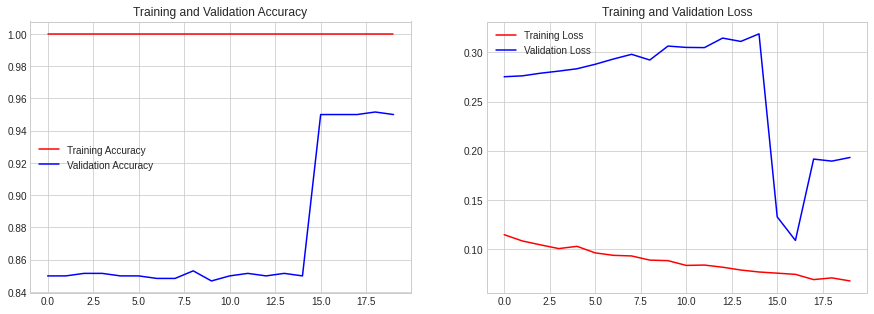

In [18]:
plot_graph(accuracy_graph)

## Predict Image

In [19]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'fresh', 1: 'non-fresh'}


Saving fresh fish sample.jpg to fresh fish sample.jpg


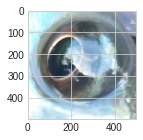

fresh fish sample.jpg
Predicted as  [[0]] labeled as  segar


In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn

  def tampilkan_(ini):
    fig = plt.figure(figsize=(2, 2))
    img = plt.imread(ini)
    plt.imshow(img)
    plt.show()

  tampilkan_(path)
  img = image.load_img(path, target_size = (size, size))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  
  print(fn)
  if hasil==0:
    jenis = "segar"
  else:
    jenis = "tidak segar"

  print("Predicted as ", hasil, "labeled as ",jenis)

## Conclusion

From the training and validation processes, both produce high accuracy values, the training process produces an accuracy value of 100% and the validation process is 95%. Then the model is tested to predict the eye pupil images of fresh fish taken from file explorer and identified as fresh fish. This shows that the model has good performance.